<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/Regression_LinearRegression_Assumptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assumptions of linear regression

Table of Content
<br><a href="#linearity">1. Linearity</a>
<br><a href="#mean">2. Mean of Residuals</a>
<br><a href="#homo">3. Check for Homoscedasticity</a>
<br><a href="#normal">4. Check for Normality of error terms/residuals</a>
<br><a href="#auto">5. No autocorrelation of residuals</a>
<br><a href="#multico">6. No perfect multicollinearity</a>



In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('/content/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


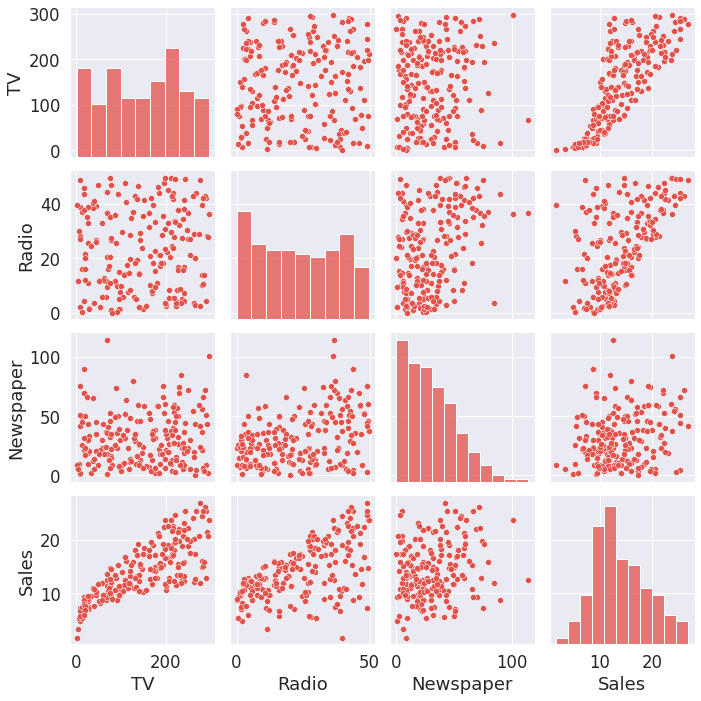

In [10]:
p = sns.pairplot(df)

#Assumptions

##1. Linearity :
    Linear regression needs the relationship between the independent and dependent variables to be linear.  
    Let's use a pair plot to check the relation of independent variables with the Sales variable

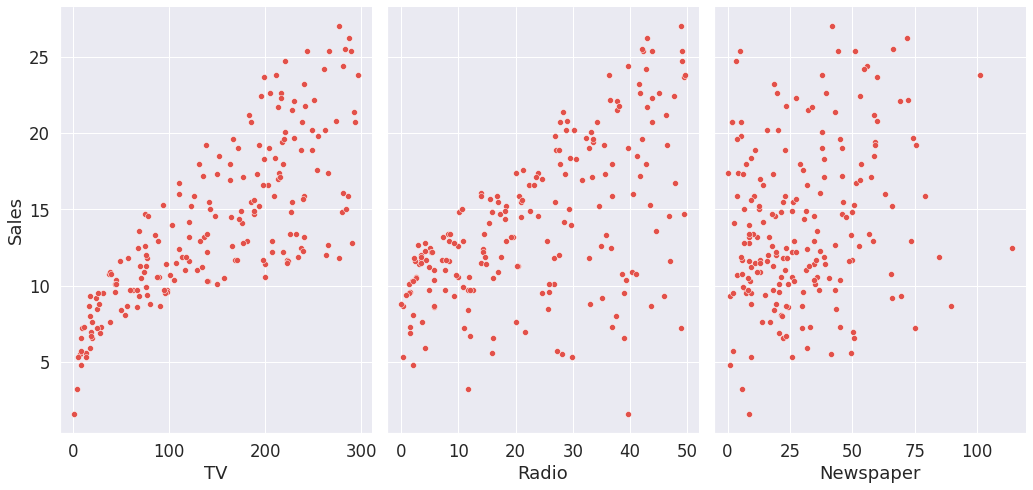

In [11]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7)

Conclusion :

    By looking at the plots we can see that with the Sales variable the none of the independent variables form an accurately 
    linear shape but TV and Radio do still better than Newspaper which seems to hardly have any specific shape. 
    So it shows that a linear regression fitting might not be the best model for it. 
    A linear model might not be able to *efficiently* explain the data in terms of variability, prediction accuracy etc. 

A tip is to remember to always see the plots from where the dependent variable is on the y axis. Though it wouldn't vary the shape much but that's how linear regression's intuition is, to put the dependent variable as y and independents as x(s).

[Now rest of the assumptions require us to perform the regression before we can even check for them. So let's perform regression on it.](https://)


##Fiting linear model

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

In [14]:
x = df.drop(["Sales"],axis=1)
y = df.Sales

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [15]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.9072183330817297


##2. Mean of residual

    Residuals as we know are the differences between the true value and the predicted value. 
    One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.


In [16]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -6.158037043254202e-16


Coclusion : close to zero states goodness in prediction.

##3. Check for Homoscedasticity :

    Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. 
    By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

##Detecting homoscedasticity

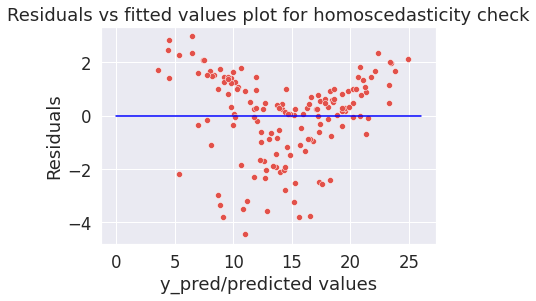

In [17]:
#Graphical method

p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

    applying tests. 
    A tip is to keep in mind that if we want 95% confidence on our findings and tests then the p-value should be less than 0.05 to be able to reject the null hypothesis. 
    Remember, a researcher or data scientist would always aim to reject the null hypothesis.

###Goldfeld Quandt Test
Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

  * Null Hypothesis: Error terms are homoscedastic
  * Alternative Hypothesis: Error terms are heteroscedastic.

In [18]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 1.1095600395272507), ('p-value', 0.33016677253163296)]

Conclusion : 
    
    Since p value is more than 0.05 in Goldfeld Quandt Test, 
    we can't reject it's null hypothesis that error terms are homoscedastic Good.

##4. Normality of error terms :

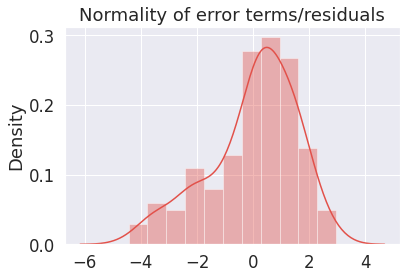

In [19]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Conclusion :

    The residual terms are pretty much normally distributed for the number of test points we took. 
    Remember the central limit theorem which says that as the sample size increases the distribution tends to be normal. 
    A skew is also visible from the plot. 
    It's very difficult to get perfect curves, distributions in real life data.

##5. No autocorrelation of residuals :

    When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values
    and that there is a definite unexplained pattern in the Y variable that shows up in the error terms. 
    Though it is more evident in time series data.



    In plain terms autocorrelation takes place when there's a pattern in the rows of the data. 
    This is usual in time series data as there is a pattern of time for eg. 
    Week of the day effect which is a very famous pattern seen in stock markets where people tend to buy stocks 
    more towards the beginning of weekends and tend to sell more on Mondays. 
    There's been great study about this phenomenon and it is still a matter of research as to what actual factors cause this trend.


    There should not be autocorrelation in the data so the error terms should not form any pattern.

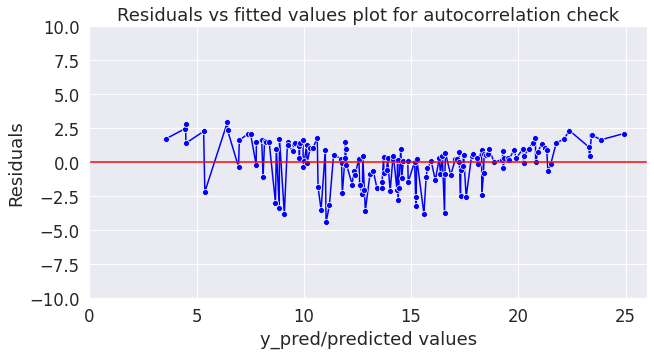

In [20]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.

* Null Hypothesis: Autocorrelation is absent.
* Alternative Hypothesis: Autocorrelation is present.

In [21]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.00842557733996383

Conclusion :

    Since p value is less than 0.05 we reject the null hypothesis that error terms are not autocorrelated.

##6. No perfect multicollinearity :

    In regression, multicollinearity refers to the extent to which independent variables are correlated. 
    Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, 
    and the goodness-of-fit statistics. 
    If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, 
    you don’t need to reduce severe multicollinearity.

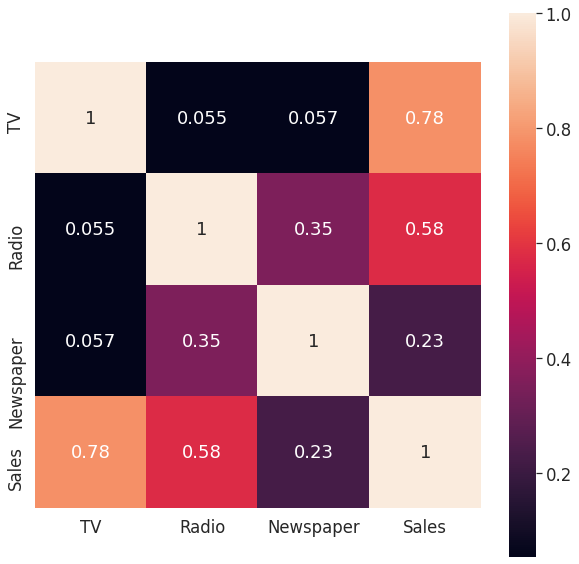

In [22]:
plt.figure(figsize=(10,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,square=True)  # seaborn has very simple solution for heatmap

Conclusion :

    Look for correlation of rows where the dependent variable (Sales in this case) is not involved 
    because if a variable is correlated with the dependent variable then this would be a good sign for our model. 
    Correlation within dependent variables is what we need to look for and avoid. 
    This data doesn't contain perfect multicollinearity among independent variables. 
    In case there was any then we would try to remove one of the correlated variables 
    depending on which was more important to our regression model